# KRITHIKA M
TASK 3 - PREDICTION USING DECISION TREE ALGORITHM

In [4]:
#importing the dataset from a csv file as a dataframe.
iris <- read.csv("http://localhost:8889/edit/Downloads/Iris.csv")

In [6]:
#common functions that can be performed to know more about the dataframe.
data(iris)
head(iris)
summary(iris)
str(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


# CLASSIFICATION USING DESCISION TREE

In [18]:
#rpart package to implement trees.
library(rpart)

Warning message:
"package 'rpart' was built under R version 3.6.3"

# Conclusions of the data:
1)If the value of Petal.Length is less than 2.5, the flower belongs to "setosa" species.
2)If the value of Petal.Length is greater than or equal to 2.5,
 --> and the Petal.Width is less than 1.8, the flower belongs to the "versicolor" species.
 --> and the Petal.Width is greater than or equal to 1.8, the flower belongs to the "virginica" species.

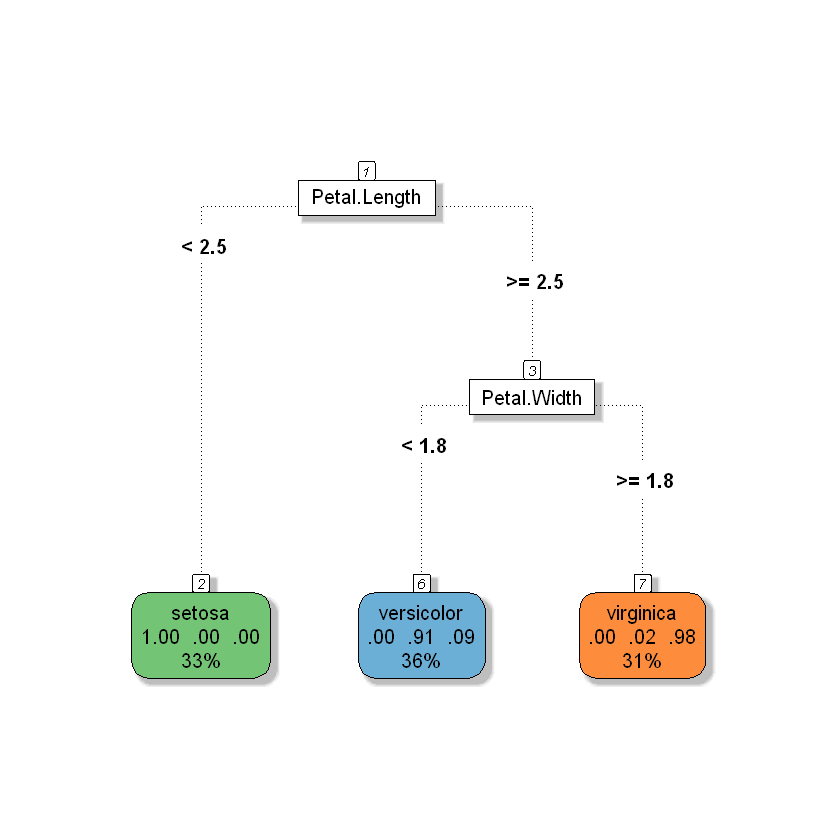

In [20]:
dtree <- rpart(Species ~ ., data = iris)
rattle::fancyRpartPlot(dtree, type = 5, sub = "")

# SPLITTING DATA INTO TRAIN AND TEST DATA

In [22]:
set.seed(3) 
#partitioning the data based on species for 1 time and 50% proportionality.
partition <- createDataPartition(factor(iris$Species), 
                           times = 1, 
                           p = 0.5, 
                           list = FALSE)

#train data --> data given to the model to train it.
trainset <- iris[partition,] 
#test data --> unseen by the model, to test the accuracy of model at the end.
testset_data <- iris[-partition,] %>% select(-Species)   
testset_labels <- iris[-partition,] %>% select(Species)

In [23]:
#Using the caret package to train the model.
library(caret)

Cross validation to train models with input, and hence detect overfitting.
tarinControl() --> control the utilities of train()
The arguments:
1)method --> resampling method
2)verboseIter --> training log
3)savePredictions --> indicates number of predictions to be saved
4)classProbs --> whether or not to classify.

In [30]:
control <- trainControl(method = "cv", 
                        verboseIter = TRUE,
                        savePredictions = "final",
                        classProbs = TRUE) 

set.seed(1)

randomForest package implemet random forest algorithm to create a decision tree and visualise the graph.
train() function fits the model and calulates a measure.
The arguments:
1)data --> dataframe containing the varibales.
2)trControl --> controls how the function acts.
3)maximize --> metric is maximised
4)tuneGrid --> dataframe of tuning values.
5)method --> method of classification model.

In [31]:
model <- train(Species ~ ., data = iris,
               trControl = control,
               maximize = TRUE,
               tuneGrid = data.frame(mtry = 4),
               method = "rf") 

+ Fold01: mtry=4 
- Fold01: mtry=4 
+ Fold02: mtry=4 
- Fold02: mtry=4 
+ Fold03: mtry=4 
- Fold03: mtry=4 
+ Fold04: mtry=4 
- Fold04: mtry=4 
+ Fold05: mtry=4 
- Fold05: mtry=4 
+ Fold06: mtry=4 
- Fold06: mtry=4 
+ Fold07: mtry=4 
- Fold07: mtry=4 
+ Fold08: mtry=4 
- Fold08: mtry=4 
+ Fold09: mtry=4 
- Fold09: mtry=4 
+ Fold10: mtry=4 
- Fold10: mtry=4 
Aggregating results
Fitting final model on full training set


In [25]:
model

Random Forest 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results:

  Accuracy   Kappa
  0.9533333  0.93 

Tuning parameter 'mtry' was held constant at a value of 4

The accuracy of model is 93%.

Confusion matrix of train data.

In [26]:
confusionMatrix.train(model)

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   setosa versicolor virginica
  setosa       33.3        0.0       0.0
  versicolor    0.0       31.3       2.7
  virginica     0.0        2.0      30.7
                            
 Accuracy (average) : 0.9533


# Testing the model using the test data

In [28]:
predictionvalue <- predict(model, trainset)

In [29]:
confusionMatrix(predictionvalue, testset_labels$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         25          0         0
  versicolor      0         25         0
  virginica       0          0        25

Overall Statistics
                                    
               Accuracy : 1         
                 95% CI : (0.952, 1)
    No Information Rate : 0.3333    
    P-Value [Acc > NIR] : < 2.2e-16 
                                    
                  Kappa : 1         
                                    
 Mcnemar's Test P-Value : NA        

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            0.3333   

In [ ]:
From the above prediction, the accuracy of the model is 1, i.e 100% accuracy.